### Analysis of earthquake on world map upto year 2016

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("csv/"))

# Any results you write to the current directory are saved as output.

['earthquake_database.csv', 'volcano_data_2010.csv']


In [2]:
df = pd.read_csv('csv/earthquake_database.csv')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [3]:
vol = pd.read_csv('csv/volcano_data_2010.csv')
print(vol.columns)
vol = vol[['Year', 'Month', 'Day', 'Latitude', 'Longitude', 'Type']].dropna()
vol['Date'] = pd.to_datetime(vol[['Year', 'Month', 'Day']])
vol = vol.drop(columns = {'Year', 'Month', 'Day'})
vol.head()


Index(['Year', 'Month', 'Day', 'TSU', 'EQ', 'Name', 'Location', 'Country',
       'Latitude', 'Longitude', 'Elevation', 'Type', 'Status', 'Time', 'VEI',
       'Agent', 'DEATHS', 'DEATHS_DESCRIPTION', 'MISSING',
       'MISSING_DESCRIPTION', 'INJURIES', 'INJURIES_DESCRIPTION',
       'DAMAGE_MILLIONS_DOLLARS', 'DAMAGE_DESCRIPTION', 'HOUSES_DESTROYED',
       'HOUSES_DESTROYED_DESCRIPTION', 'TOTAL_DEATHS',
       'TOTAL_DEATHS_DESCRIPTION', 'TOTAL_MISSING',
       'TOTAL_MISSING_DESCRIPTION', 'TOTAL_INJURIES',
       'TOTAL_INJURIES_DESCRIPTION', 'TOTAL_DAMAGE_MILLIONS_DOLLARS',
       'TOTAL_DAMAGE_DESCRIPTION', 'TOTAL_HOUSES_DESTROYED',
       'TOTAL_HOUSES_DESTROYED_DESCRIPTION'],
      dtype='object')


,Latitude,Longitude,Type,Date
1,63.630,-19.620,Stratovolcano,2010-03-31
2,14.381,-90.601,Complex volcano,2010-05-27
3,16.708,145.780,Stratovolcano,2010-05-29
4,2.780,125.480,Stratovolcano,2010-08-06
5,3.170,98.392,Stratovolcano,2010-08-30


In [4]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [5]:
df = df[['Date', 'Latitude', 'Longitude', 'Magnitude', 'Type']]
df.head()

,Date,Latitude,Longitude,Magnitude,Type
0,01/02/1965,19.246,145.616,6.0,Earthquake
1,01/04/1965,1.863,127.352,5.8,Earthquake
2,01/05/1965,-20.579,-173.972,6.2,Earthquake
3,01/08/1965,-59.076,-23.557,5.8,Earthquake
4,01/09/1965,11.938,126.427,5.8,Earthquake


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
print(set(df['Type']))
df.head()

{'Rock Burst', 'Earthquake', 'Explosion', 'Nuclear Explosion'}


,Date,Latitude,Longitude,Magnitude,Type
0,1965-01-02,19.246,145.616,6.0,Earthquake
1,1965-01-04,1.863,127.352,5.8,Earthquake
2,1965-01-05,-20.579,-173.972,6.2,Earthquake
3,1965-01-08,-59.076,-23.557,5.8,Earthquake
4,1965-01-09,11.938,126.427,5.8,Earthquake


In [7]:
print('Size of the Dataframe', df.shape)
eq = df[df['Type'] == 'Earthquake']
others = df[df['Type'] != 'Earthquake']

Size of the Dataframe (23412, 5)


In [8]:
# Earthquake, Volcanic eruptions and Nuclear Explosions regions on World Map

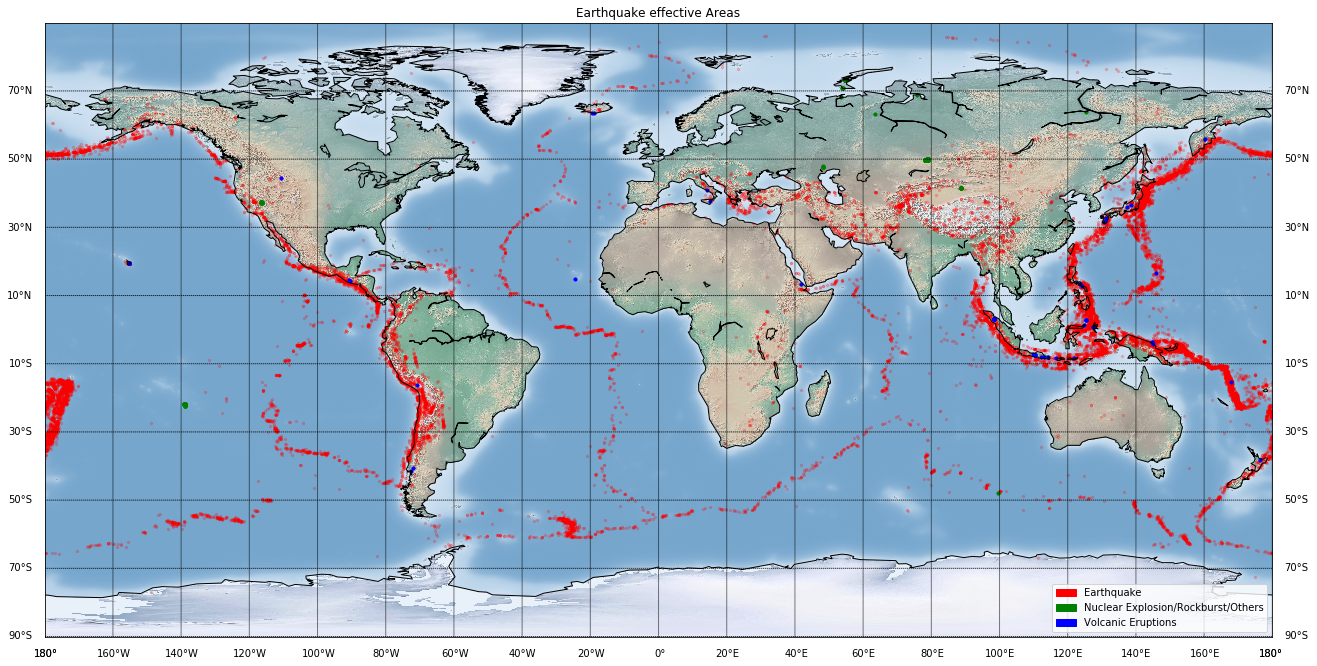

In [12]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


fig = plt.figure(figsize = (22, 20))
wmap = Basemap(resolution = 'c')
longitudes = eq['Longitude'].tolist()
latitudes = eq['Latitude'].tolist()
x_eq, y_eq = wmap(longitudes, latitudes)
longitudes = others['Longitude'].tolist()
latitudes = others['Latitude'].tolist()
x_oth, y_oth = wmap(longitudes, latitudes)
longitudes = vol['Longitude'].tolist()
latitudes = vol['Latitude'].tolist()
x_vol, y_vol = wmap(longitudes, latitudes)
fig = plt.title('Earthquake effective Areas')
red_patch = mpatches.Patch(color='r', label='Earthquake')
green_patch = mpatches.Patch(color='g', label='Nuclear Explosion/Rockburst/Others')
blue_patch = mpatches.Patch(color='b', label='Volcanic Eruptions')
wmap.drawcoastlines()
wmap.shadedrelief()
wmap.scatter(x_eq, y_eq, s = 5, c = 'r', alpha = 0.2)
wmap.scatter(x_oth, y_oth, s = 10, c = 'g')
wmap.scatter(x_vol, y_vol, s = 10, c = 'b')
# draw parallels
wmap.drawparallels(np.arange(-90,90,20),labels=[1,1,0,1])
# draw meridians
wmap.drawmeridians(np.arange(-180,180,20),labels=[1,1,0,1])
fig = plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

In [10]:
# Effected Areas with Magnitude Heatmap

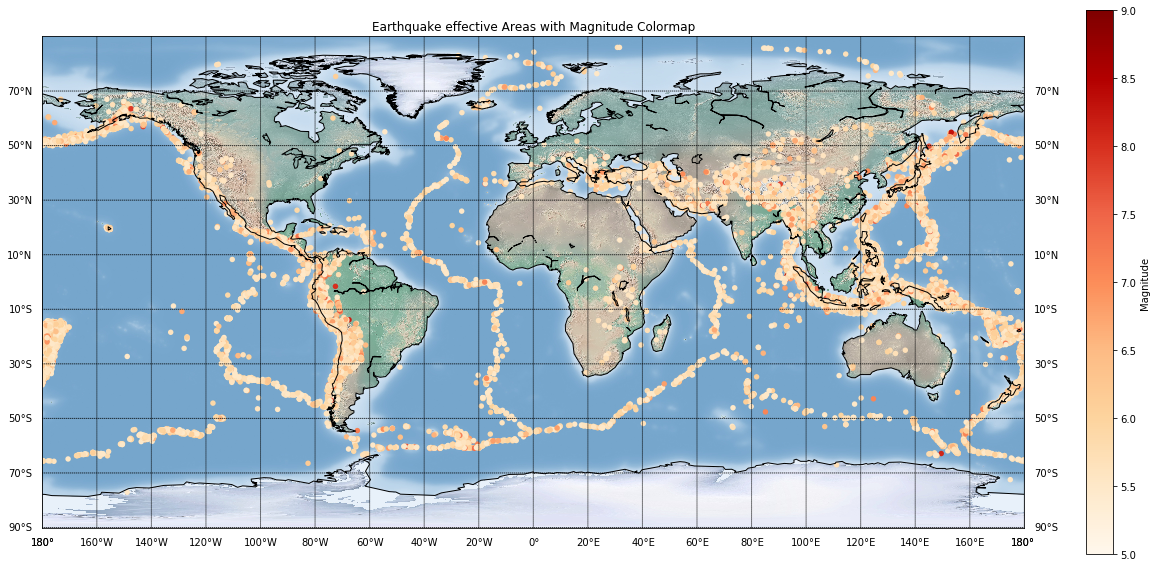

In [11]:
fig = plt.figure(figsize = (22, 20))
wmap = Basemap()
longitudes = eq['Longitude'].tolist()
latitudes = eq['Latitude'].tolist()
x_eq, y_eq = wmap(longitudes, latitudes)
wmap.drawcoastlines()
wmap.shadedrelief()
# draw parallels
wmap.drawparallels(np.arange(-90,90,20),labels=[1,1,0,1])
# draw meridians
wmap.drawmeridians(np.arange(-180,180,20),labels=[1,1,0,1])
plt.title('Earthquake effective Areas with Magnitude Colormap')
sc = wmap.scatter(x_eq, y_eq, s = 30, c = eq['Magnitude'], vmin=5, vmax =9, cmap='OrRd', edgecolors='none')
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label('Magnitude')
plt.show()


### Conclusion:
From above ploting of earthquake prone regions, it can be concluded that earthquakes are more prone in western coast of North and South America, center of Atlantic Ocean, Himalian region and Eastern Asian Countries like Indonesia, Japan, Korea.